<a href="https://colab.research.google.com/github/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Graduate_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality Prediction of Iron Ore Mining Flotation Process**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, norm, boxcox
import os
import joblib
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler

In [2]:
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Flotation/

Mounted at /content/drive/
/content/drive/My Drive/Flotation


In [17]:
flotation = pd.read_csv('Flotation_Plant_Clean.csv')

##**4. Data Preprocessing**

###**4.1. Dataset information**

In [18]:
flotation.head().T

,0,1,2,3,4
date,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00,2017-03-10 01:00:00
iron_feed,55.2,55.2,55.2,55.2,55.2
silica_feed,16.98,16.98,16.98,16.98,16.98
starch_flow,301.953,302.441,304.346,304.736,303.369
amina_flow,557.434,563.965,568.054,568.665,558.167
pulp_flow,395.713,397.383,399.668,397.939,400.254
pulp_pH,10.07,10.07,10.07,10.07,10.07
pulp_density,1.74,1.74,1.74,1.74,1.74
airflow_col1,249.214,249.719,249.741,249.917,250.203
airflow_col2,253.235,250.532,247.874,254.487,252.136


In [19]:
flotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          737453 non-null  object 
 1   iron_feed     737453 non-null  float64
 2   silica_feed   737453 non-null  float64
 3   starch_flow   737453 non-null  float64
 4   amina_flow    737453 non-null  float64
 5   pulp_flow     737453 non-null  float64
 6   pulp_pH       737453 non-null  float64
 7   pulp_density  737453 non-null  float64
 8   airflow_col1  736850 non-null  float64
 9   airflow_col2  736803 non-null  float64
 10  airflow_col3  736843 non-null  float64
 11  airflow_col4  737075 non-null  float64
 12  airflow_col5  737066 non-null  float64
 13  airflow_col6  736757 non-null  float64
 14  airflow_col7  736766 non-null  float64
 15  level_col1    736719 non-null  float64
 16  level_col2    736687 non-null  float64
 17  level_col3    736673 non-null  float64
 18  leve

In [20]:
flotation.drop(['date'], axis=1, inplace=True)

In [21]:
flotation.head().T

,0,1,2,3,4
iron_feed,55.200,55.200,55.200,55.200,55.200
silica_feed,16.980,16.980,16.980,16.980,16.980
starch_flow,301.953,302.441,304.346,304.736,303.369
amina_flow,557.434,563.965,568.054,568.665,558.167
pulp_flow,395.713,397.383,399.668,397.939,400.254
pulp_pH,10.070,10.070,10.070,10.070,10.070
pulp_density,1.740,1.740,1.740,1.740,1.740
airflow_col1,249.214,249.719,249.741,249.917,250.203
airflow_col2,253.235,250.532,247.874,254.487,252.136
airflow_col3,250.576,250.862,250.313,250.049,249.895


In [22]:
flotation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737453 entries, 0 to 737452
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   iron_feed     737453 non-null  float64
 1   silica_feed   737453 non-null  float64
 2   starch_flow   737453 non-null  float64
 3   amina_flow    737453 non-null  float64
 4   pulp_flow     737453 non-null  float64
 5   pulp_pH       737453 non-null  float64
 6   pulp_density  737453 non-null  float64
 7   airflow_col1  736850 non-null  float64
 8   airflow_col2  736803 non-null  float64
 9   airflow_col3  736843 non-null  float64
 10  airflow_col4  737075 non-null  float64
 11  airflow_col5  737066 non-null  float64
 12  airflow_col6  736757 non-null  float64
 13  airflow_col7  736766 non-null  float64
 14  level_col1    736719 non-null  float64
 15  level_col2    736687 non-null  float64
 16  level_col3    736673 non-null  float64
 17  level_col4    736277 non-null  float64
 18  leve

###**4.3. Check Missing & Duplicated Values**

In [23]:
missing_values = flotation.isnull().sum()
print(missing_values)

iron_feed          0
silica_feed        0
starch_flow        0
amina_flow         0
pulp_flow          0
pulp_pH            0
pulp_density       0
airflow_col1     603
airflow_col2     650
airflow_col3     610
airflow_col4     378
airflow_col5     387
airflow_col6     696
airflow_col7     687
level_col1       734
level_col2       766
level_col3       780
level_col4      1176
level_col5       739
level_col6       766
level_col7       761
iron_conc          0
silica_conc        0
dtype: int64


- There are missing values in airflow and level columns in the the dataframe

In [24]:
# Drop rows with any missing values
flotation = flotation.dropna()
missing_values = flotation.isnull().sum()
print(missing_values)

iron_feed       0
silica_feed     0
starch_flow     0
amina_flow      0
pulp_flow       0
pulp_pH         0
pulp_density    0
airflow_col1    0
airflow_col2    0
airflow_col3    0
airflow_col4    0
airflow_col5    0
airflow_col6    0
airflow_col7    0
level_col1      0
level_col2      0
level_col3      0
level_col4      0
level_col5      0
level_col6      0
level_col7      0
iron_conc       0
silica_conc     0
dtype: int64


In [25]:
flotation.shape

(727798, 23)

In [26]:
duplicates = flotation[flotation.duplicated()]
duplicates.count()

iron_feed       1345
silica_feed     1345
starch_flow     1345
amina_flow      1345
pulp_flow       1345
pulp_pH         1345
pulp_density    1345
airflow_col1    1345
airflow_col2    1345
airflow_col3    1345
airflow_col4    1345
airflow_col5    1345
airflow_col6    1345
airflow_col7    1345
level_col1      1345
level_col2      1345
level_col3      1345
level_col4      1345
level_col5      1345
level_col6      1345
level_col7      1345
iron_conc       1345
silica_conc     1345
dtype: int64

In [27]:
# Count the number of duplicate rows
num_duplicates = flotation.duplicated().sum()

# Drop the duplicate rows from the DataFrame
flotation.drop_duplicates(inplace=True)

# Verify that duplicate rows have been eliminated
print("Number of duplicate rows:", num_duplicates)
print("Number of rows after removing duplicates:", len(flotation))

Number of duplicate rows: 1345
Number of rows after removing duplicates: 726453


###**4.4. Dataset summary statistics**

In [ ]:
round(flotation.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
iron_feed,4097.0,56.29,5.16,42.74,52.67,56.08,59.72,65.78
silica_feed,4097.0,14.65,6.81,1.31,8.94,13.85,19.60,33.40
starch_flow,4097.0,338.10,92.69,102.57,283.59,335.44,382.47,963.31
amina_flow,4097.0,488.15,83.69,242.93,436.04,502.45,549.52,736.98
pulp_flow,4097.0,397.58,8.37,376.84,398.85,399.84,400.59,418.07
pulp_pH,4097.0,9.77,0.38,8.75,9.54,9.80,10.03,10.81
pulp_density,4097.0,1.68,0.06,1.52,1.65,1.70,1.72,1.83
airflow_col1,4097.0,280.15,29.41,175.89,250.09,299.84,299.95,312.30
airflow_col2,4097.0,277.16,29.42,178.19,250.10,299.53,299.98,309.89
airflow_col3,4097.0,281.08,28.37,177.20,250.09,299.89,299.95,302.78


In [ ]:
flotation.head().T

,0,1,2,3,4
iron_feed,55.200000,55.200000,55.200000,55.200000,55.200000
silica_feed,16.980000,16.980000,16.980000,16.980000,16.980000
starch_flow,323.277098,313.325639,347.948294,334.142022,340.935100
amina_flow,578.786678,537.219661,591.906744,593.170106,619.710806
pulp_flow,398.753368,399.871822,398.763806,399.866983,399.615089
pulp_pH,10.113621,10.129944,10.048444,9.918389,9.745722
pulp_density,1.729598,1.667556,1.733000,1.730944,1.765889
airflow_col1,251.166672,249.880589,250.161328,250.208772,249.917800
airflow_col2,250.226086,250.214050,250.104167,250.204761,250.160494
airflow_col3,250.178287,250.033317,250.046350,250.120861,250.013500


In [ ]:
flotation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4097 entries, 0 to 4414
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   iron_feed     4097 non-null   float64
 1   silica_feed   4097 non-null   float64
 2   starch_flow   4097 non-null   float64
 3   amina_flow    4097 non-null   float64
 4   pulp_flow     4097 non-null   float64
 5   pulp_pH       4097 non-null   float64
 6   pulp_density  4097 non-null   float64
 7   airflow_col1  4097 non-null   float64
 8   airflow_col2  4097 non-null   float64
 9   airflow_col3  4097 non-null   float64
 10  airflow_col4  4097 non-null   float64
 11  airflow_col5  4097 non-null   float64
 12  airflow_col6  4097 non-null   float64
 13  airflow_col7  4097 non-null   float64
 14  level_col1    4097 non-null   float64
 15  level_col2    4097 non-null   float64
 16  level_col3    4097 non-null   float64
 17  level_col4    4097 non-null   float64
 18  level_col5    4097 non-null 

###**4.5. Corellation between the variables**

In [ ]:
flotation.corr()

,iron_feed,silica_feed,starch_flow,amina_flow,pulp_flow,pulp_pH,pulp_density,airflow_col1,airflow_col2,airflow_col3,...,airflow_col7,level_col1,level_col2,level_col3,level_col4,level_col5,level_col6,level_col7,iron_conc,silica_conc
iron_feed,1.000000,-0.971833,-0.012559,-0.096103,0.186244,0.007577,-0.136240,-0.062833,-0.173629,-0.062609,...,-0.017229,0.031642,0.023024,0.016523,0.019308,0.026213,0.004420,0.030095,0.055453,-0.077114
silica_feed,-0.971833,1.000000,0.029043,0.085842,-0.174750,0.008251,0.113379,0.092424,0.187099,0.084742,...,0.047718,-0.041068,-0.040838,-0.024673,-0.040812,-0.049272,-0.023235,-0.054304,-0.044189,0.072782
starch_flow,-0.012559,0.029043,1.000000,0.039582,0.047521,0.229645,-0.118286,0.104585,0.113696,0.134843,...,0.139397,-0.199213,-0.167522,-0.137965,0.036975,0.043733,0.058323,0.015003,0.035215,-0.043415
amina_flow,-0.096103,0.085842,0.039582,1.000000,0.237537,0.134096,0.659796,0.121835,0.136783,0.111313,...,0.091204,-0.276352,-0.235733,-0.290044,-0.213534,-0.242772,-0.244882,-0.199846,-0.120195,0.170936
pulp_flow,0.186244,-0.174750,0.047521,0.237537,1.000000,0.138869,0.019719,-0.160489,-0.140432,-0.164065,...,-0.171307,-0.017101,-0.020164,-0.079609,-0.008492,0.005663,-0.023276,0.024781,0.096460,0.009666
pulp_pH,0.007577,0.008251,0.229645,0.134096,0.138869,1.000000,0.122491,0.168195,0.151999,0.199074,...,0.188252,-0.179822,-0.172842,-0.155013,0.057519,0.014010,-0.090097,0.022130,0.197945,-0.151512
pulp_density,-0.136240,0.113379,-0.118286,0.659796,0.019719,0.122491,1.000000,-0.006027,0.028342,-0.035002,...,-0.060547,-0.100760,-0.078643,-0.139880,-0.102055,-0.162453,-0.120874,-0.100637,0.017147,0.050520
airflow_col1,-0.062833,0.092424,0.104585,0.121835,-0.160489,0.168195,-0.006027,1.000000,0.866607,0.959985,...,0.678017,-0.476578,-0.472045,-0.406797,-0.074354,-0.103321,-0.141681,-0.128481,0.099352,-0.220865
airflow_col2,-0.173629,0.187099,0.113696,0.136783,-0.140432,0.151999,0.028342,0.866607,1.000000,0.879141,...,0.617642,-0.473857,-0.477412,-0.407483,-0.092169,-0.128343,-0.141768,-0.133970,0.060194,-0.171580
airflow_col3,-0.062609,0.084742,0.134843,0.111313,-0.164065,0.199074,-0.035002,0.959985,0.879141,1.000000,...,0.680858,-0.475392,-0.467462,-0.399069,-0.056453,-0.072653,-0.119464,-0.099606,0.100843,-0.220484


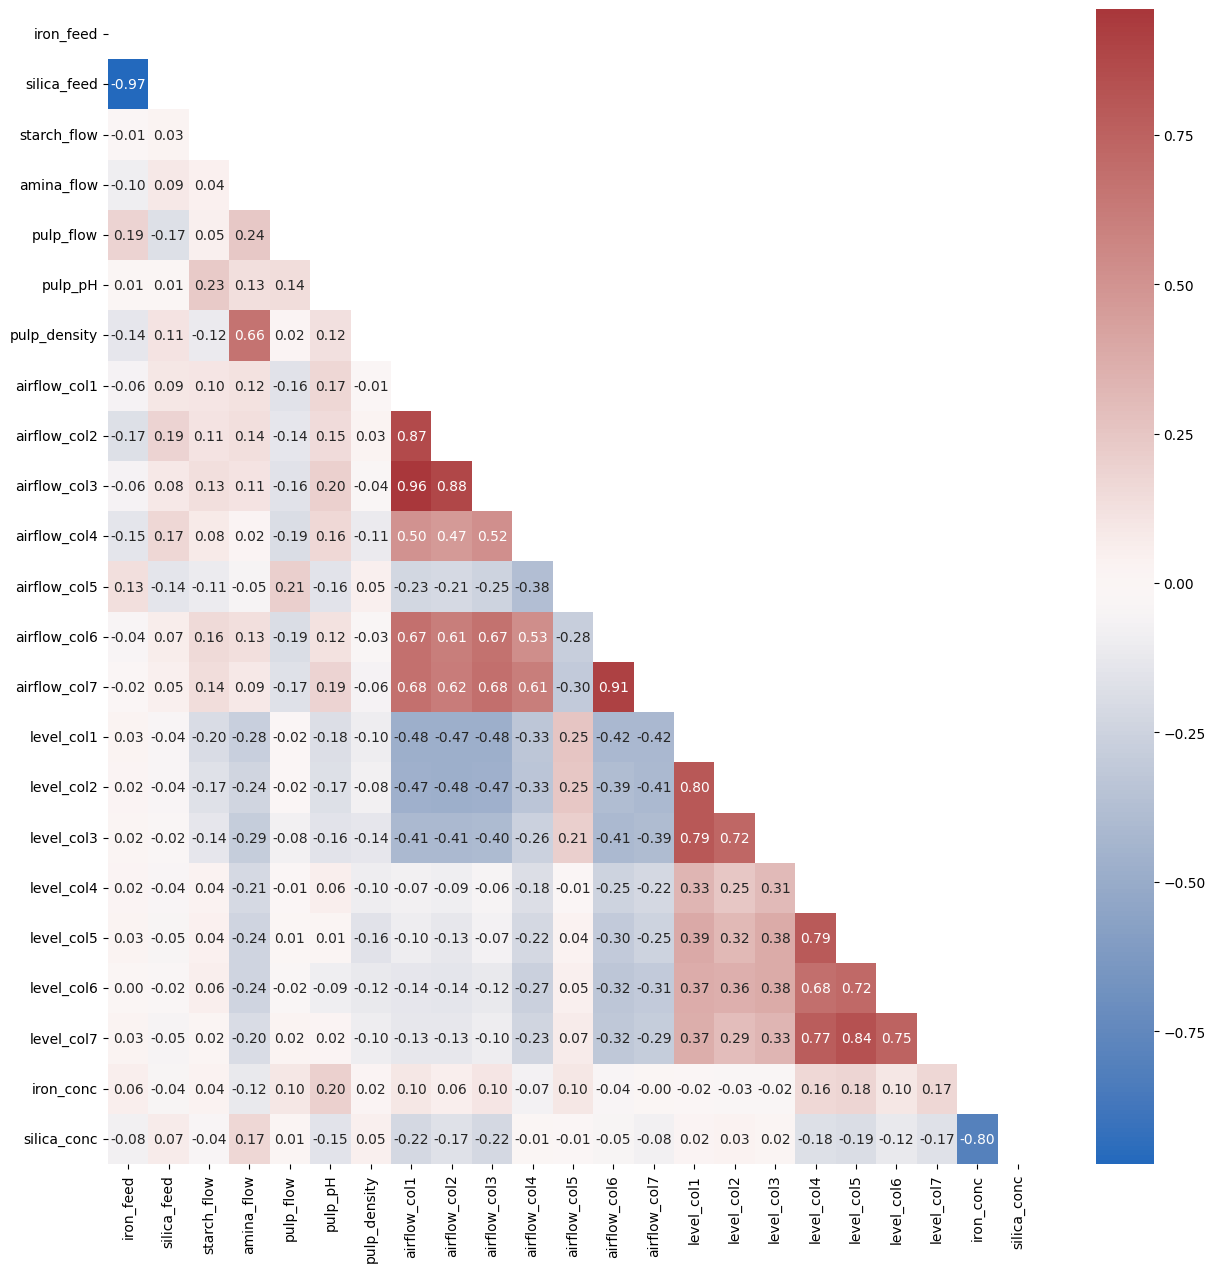

In [ ]:
mask = np.triu(np.ones_like(flotation.corr(), dtype=bool))
plt.figure(figsize=(15, 15))
sns.heatmap(flotation.corr(), annot=True, fmt='.2f', cmap='vlag', 
            annot_kws={"fontsize": 10}, mask=mask)
plt.show()


In [ ]:
correlation = flotation.corr().abs()
mask = correlation.mask(np.triu(np.ones(correlation.shape, dtype=bool)))
sorted_correlation = mask.unstack().sort_values(ascending=False)
sorted_correlation = sorted_correlation[(sorted_correlation > 0.65) & (sorted_correlation < 1.0)].reset_index()

# Rename the columns
sorted_correlation.columns = ['variable_1', 'variable_2', 'correlation_degree']

# Reorder the columns
sorted_correlation = sorted_correlation[['variable_1', 'variable_2', 'correlation_degree']]

# Print the resulting DataFrame
print(sorted_correlation)

      variable_1    variable_2  correlation_degree
0      iron_feed   silica_feed            0.971833
1   airflow_col1  airflow_col3            0.959985
2   airflow_col6  airflow_col7            0.910658
3   airflow_col2  airflow_col3            0.879141
4   airflow_col1  airflow_col2            0.866607
5     level_col5    level_col7            0.836032
6      iron_conc   silica_conc            0.801212
7     level_col1    level_col2            0.799330
8     level_col1    level_col3            0.794009
9     level_col4    level_col5            0.787744
10    level_col4    level_col7            0.772182
11    level_col6    level_col7            0.745292
12    level_col2    level_col3            0.723597
13    level_col5    level_col6            0.715789
14    level_col4    level_col6            0.683459
15  airflow_col3  airflow_col7            0.680858
16  airflow_col1  airflow_col7            0.678017
17  airflow_col1  airflow_col6            0.674750
18  airflow_col3  airflow_col6 

- Drop highly correlated columns

In [ ]:
flotation.drop(['iron_feed', 'airflow_col1', 'airflow_col2', 'airflow_col7', 'level_col1', 
                'level_col2', 'level_col4', 'level_col6', 'iron_conc'], axis=1, inplace=True)

###**4.6. Check & remove outliers**

- Visualize the variables for seeing outliers

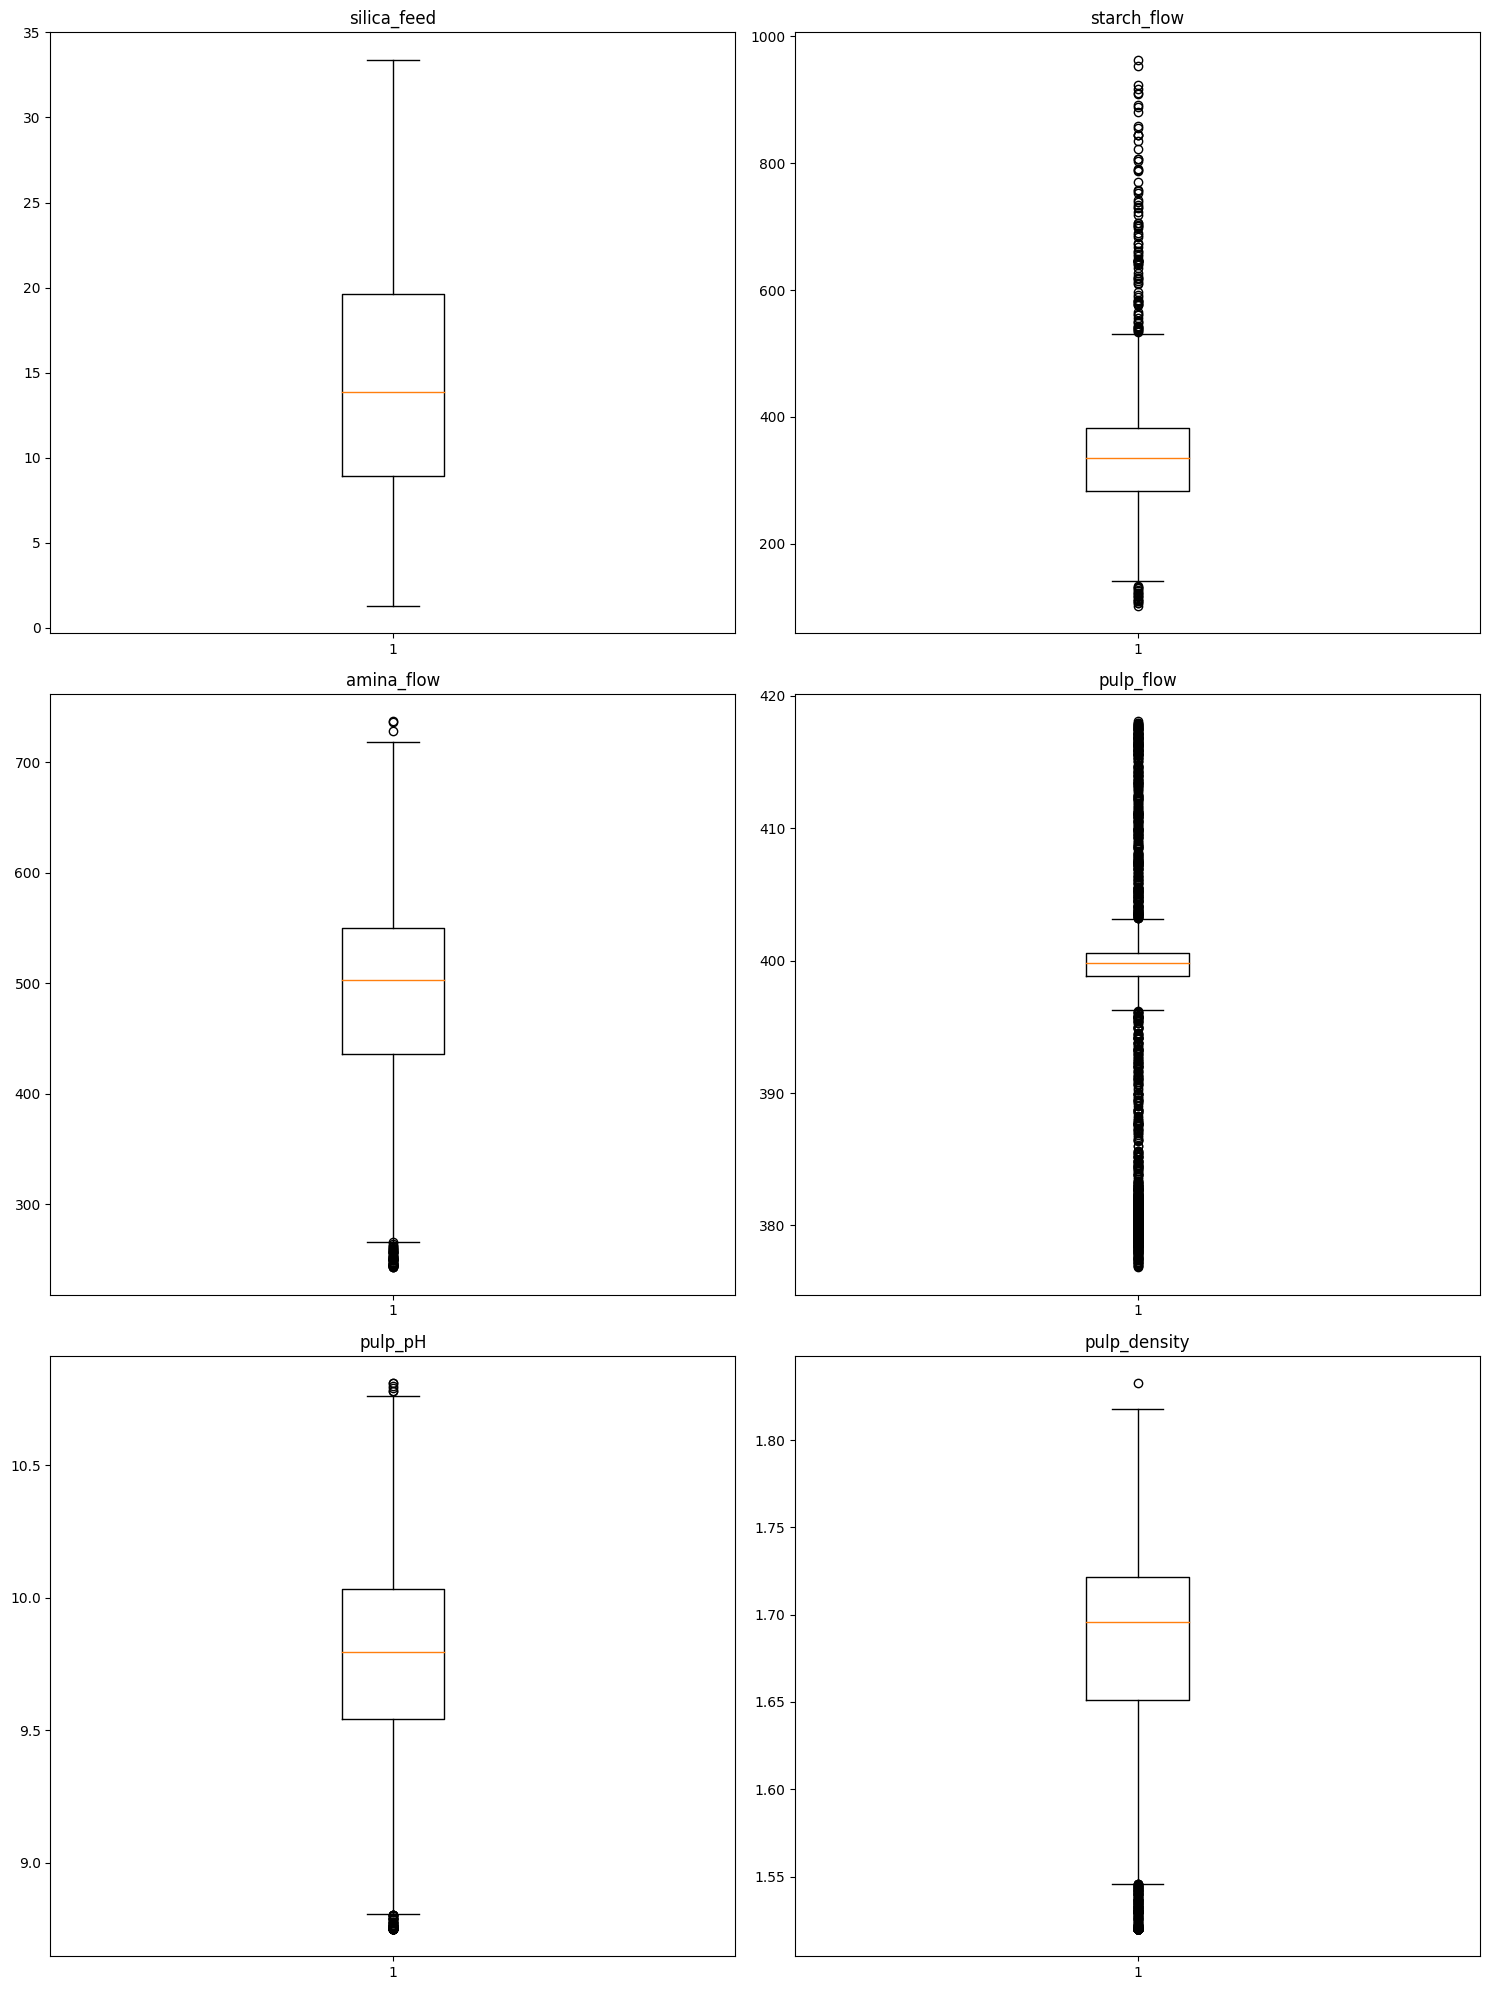

In [ ]:
variables = ["silica_feed", "starch_flow", "amina_flow", 
             "pulp_flow", "pulp_pH", "pulp_density"]

fig, axes = plt.subplots(3, 2, figsize=(15, 20))

for i, variable in enumerate(variables):
    plt.subplot(3, 2, i+1)
    data = flotation[variable]
    plt.boxplot(data)
    plt.title(variable)

plt.tight_layout()
plt.show()

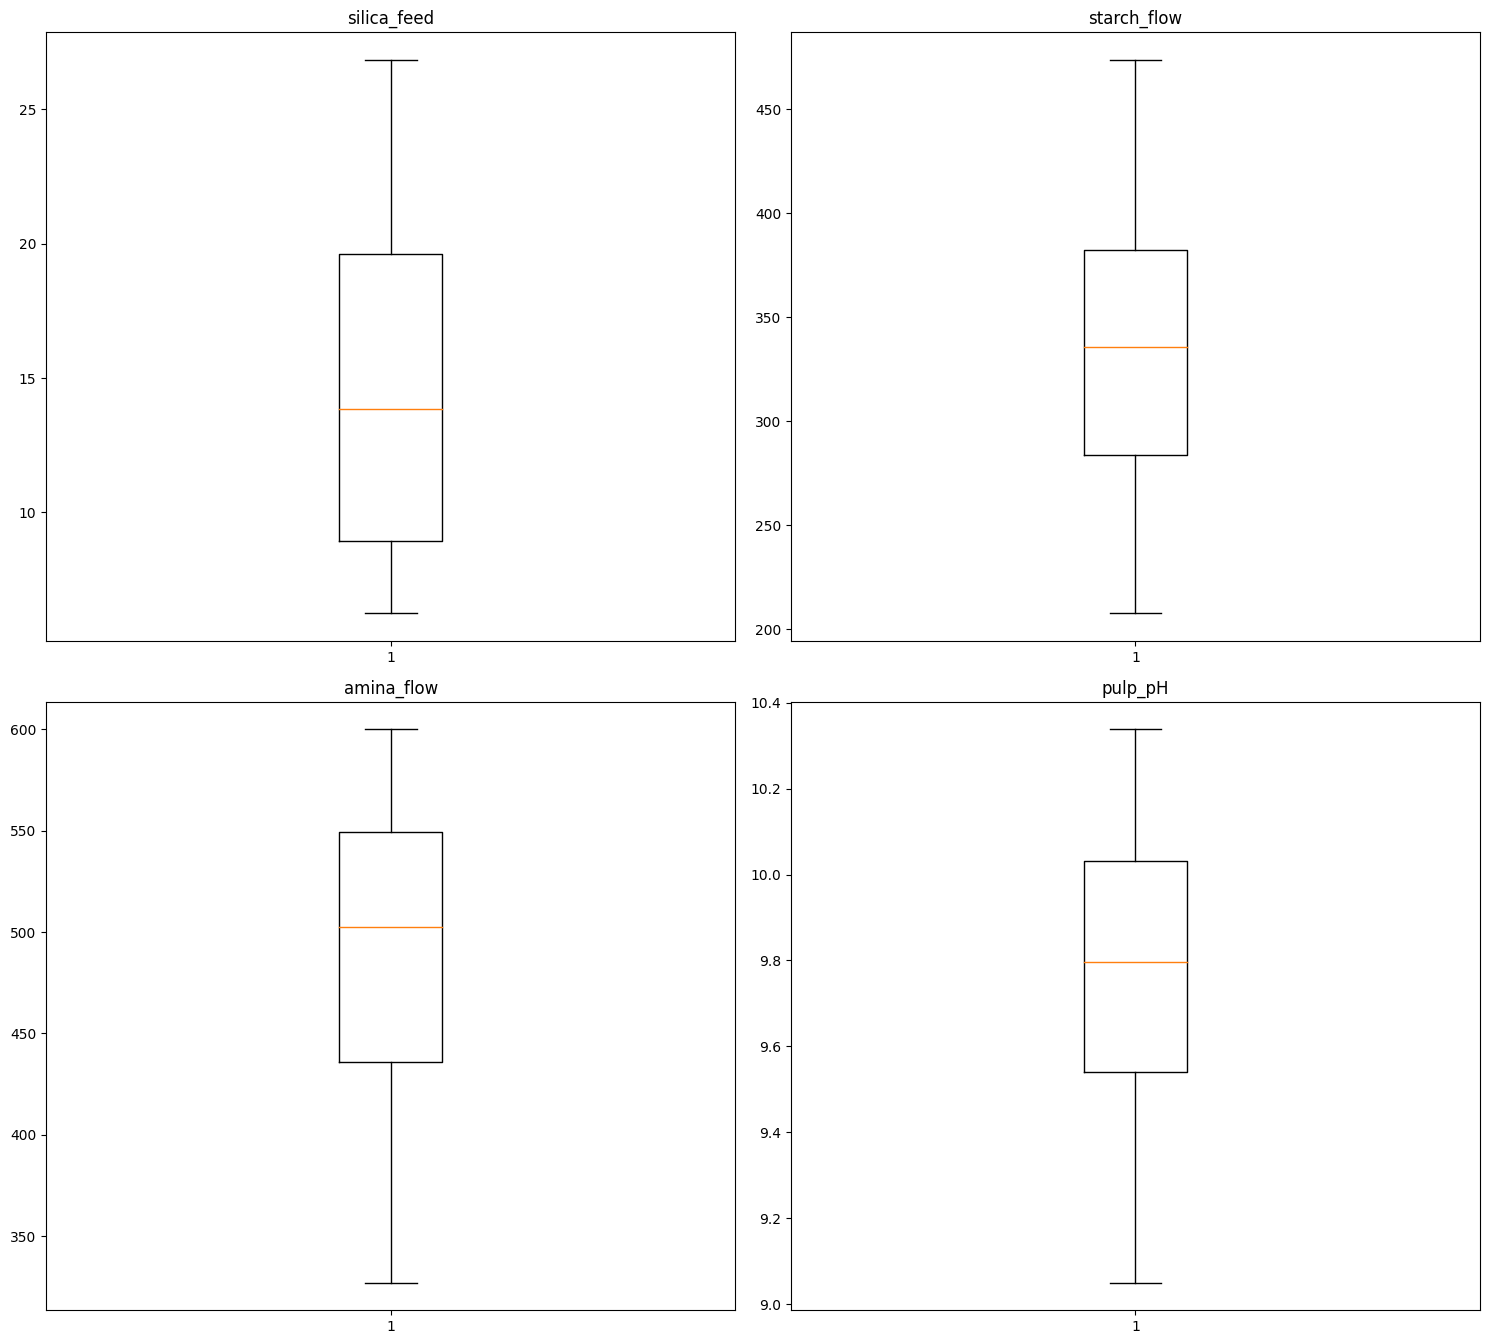

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

variables = ["silica_feed", "starch_flow", "amina_flow", "pulp_pH",]

fig, axes = plt.subplots(2, 2, figsize=(15, 20))

for i, variable in enumerate(variables):
    plt.subplot(3, 2, i+1)
    data = flotation[variable]
    data_winsorized = winsorize(data, limits=[0.05, 0.05])  # Adjust the limits as needed
    plt.boxplot(data_winsorized)
    plt.title(variable)

plt.tight_layout()
plt.show()


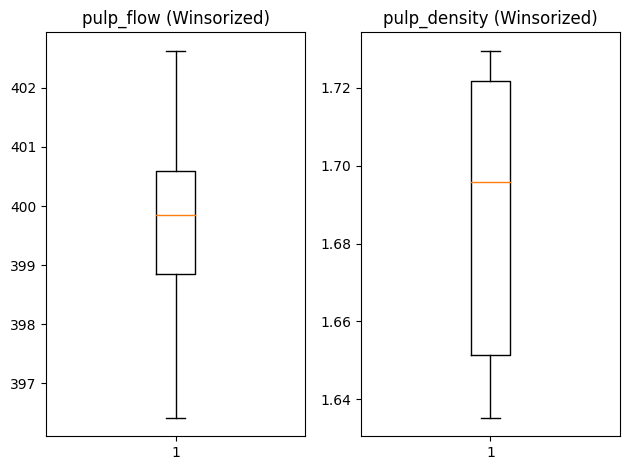

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

# Winsorize "pulp_flow" column
pulp_flow_data = flotation["pulp_flow"]
pulp_flow_winsorized = winsorize(pulp_flow_data, limits=[0.2, 0.1])  # Adjust the limits as needed

plt.subplot(1, 2, 1)
plt.boxplot(pulp_flow_winsorized)
plt.title("pulp_flow (Winsorized)")

# Winsorize "pulp_density" column
pulp_density_data = flotation["pulp_density"]
pulp_density_winsorized = winsorize(pulp_density_data, limits=[0.2, 0.2])  # Adjust the limits as needed

plt.subplot(1, 2, 2)
plt.boxplot(pulp_density_winsorized)
plt.title("pulp_density (Winsorized)")

plt.tight_layout()
plt.show()


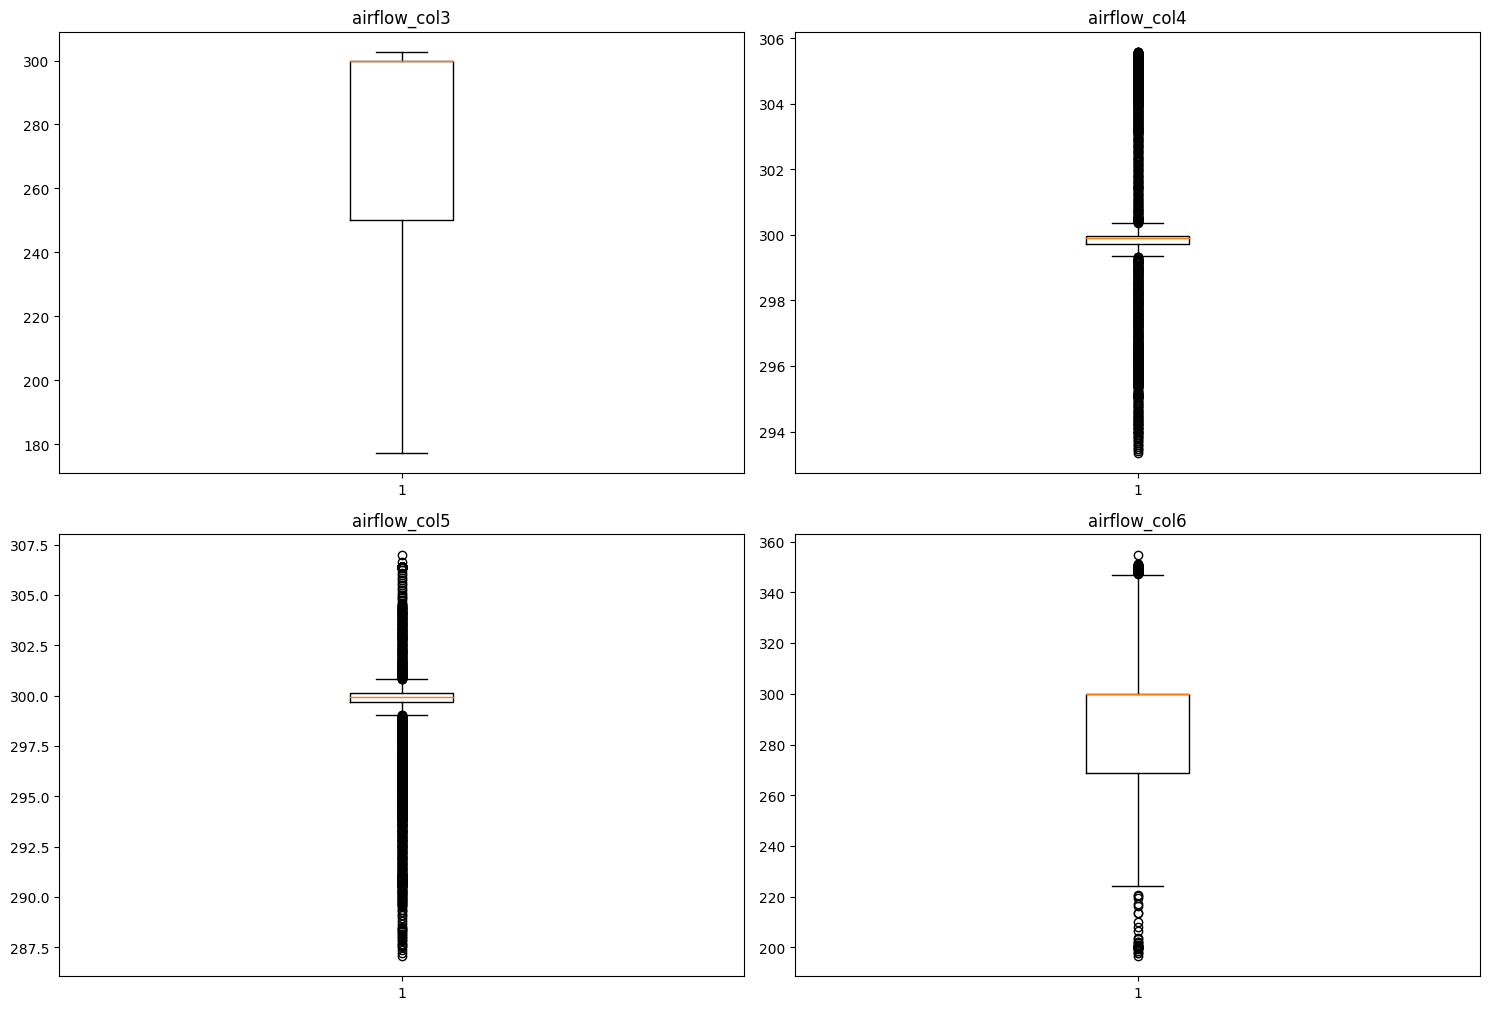

In [ ]:
variables = ["airflow_col3", "airflow_col4", 
             "airflow_col5", "airflow_col6"]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, variable in enumerate(variables):
    plt.subplot(3, 2, i+1)
    data = flotation[variable]
    plt.boxplot(data)
    plt.title(variable)

plt.tight_layout()
plt.show()

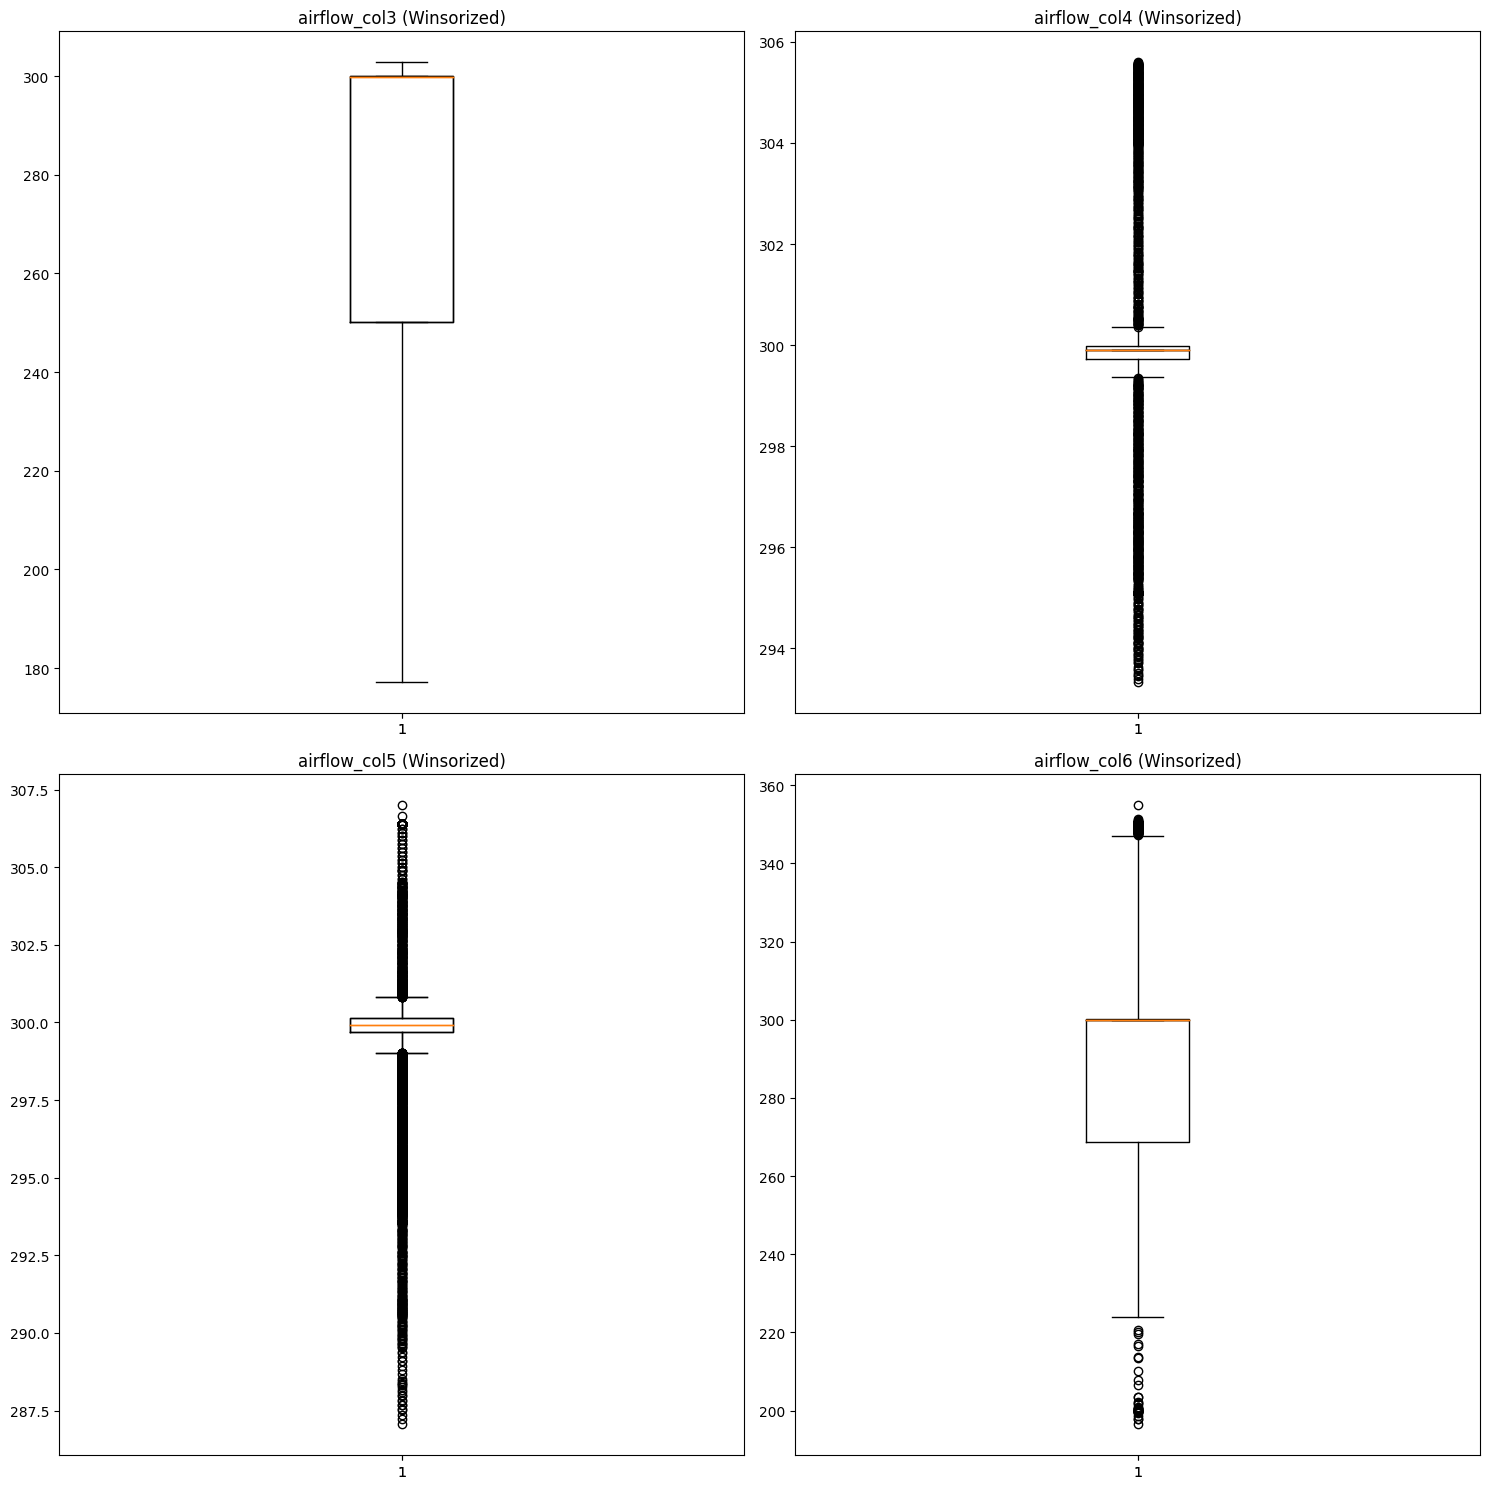

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

variables = ["airflow_col3", "airflow_col4", "airflow_col5", "airflow_col6"]
limits = {"airflow_col3": [0.2, 0.3], "airflow_col4": [0.5, 0.5], 
          "airflow_col5": [0.05, 0.1], "airflow_col6": [0.7, 0.7]}

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, variable in enumerate(variables):
    plt.subplot(2, 2, i+1)
    data = flotation[variable]
    plt.boxplot(data)
    plt.title(variable)

    # Winsorize the data
    data_winsorized = winsorize(data, limits=limits[variable])

    # Plot the winsorized data
    plt.subplot(2, 2, i+1)
    plt.boxplot(data_winsorized)
    plt.title(variable + " (Winsorized)")

plt.tight_layout()
plt.show()


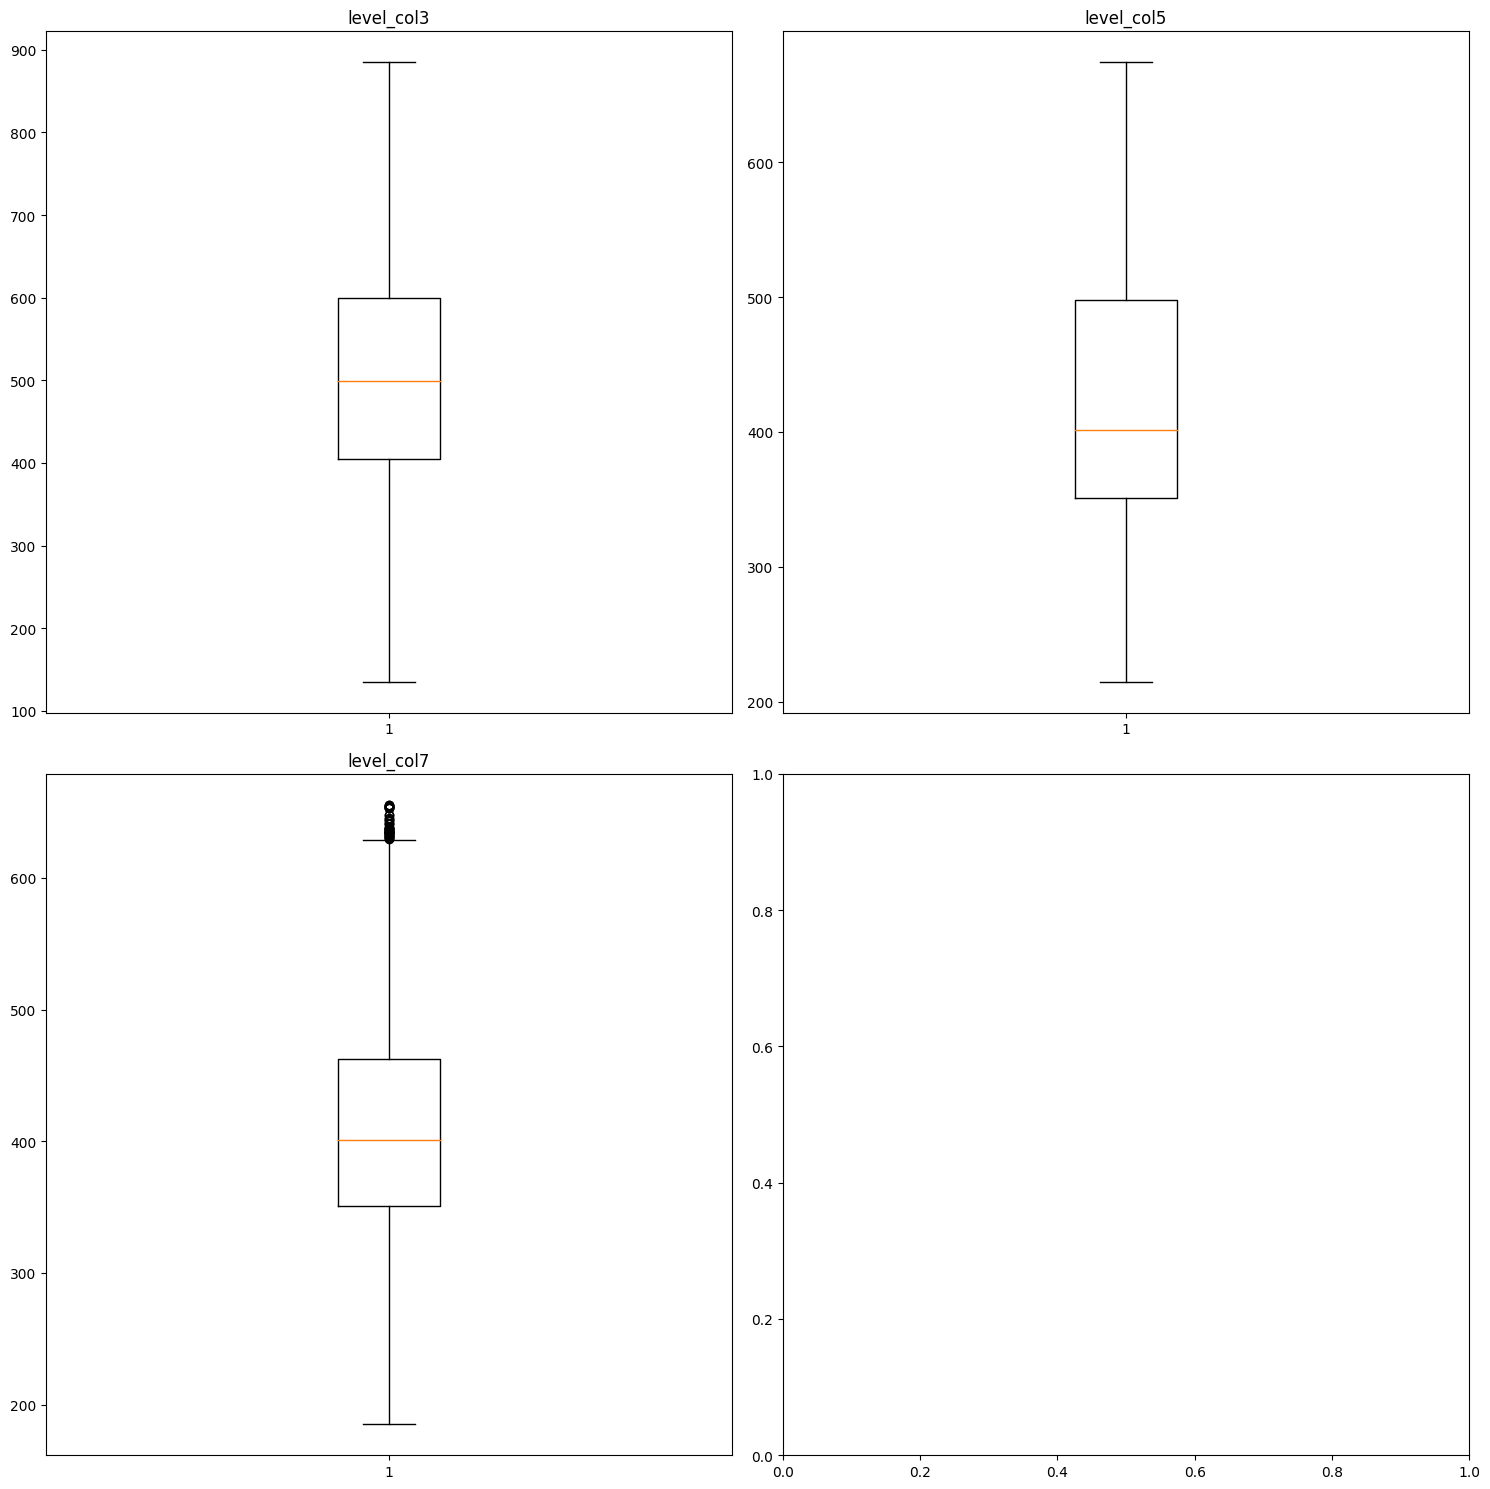

In [ ]:
variables = ["level_col3", 
             "level_col5", "level_col7"]

fig, axes = plt.subplots(2, 2, figsize=(15, 15))

for i, variable in enumerate(variables):
    plt.subplot(2, 2, i+1)
    data = flotation[variable]
    plt.boxplot(data)
    plt.title(variable)

plt.tight_layout()
plt.show()

- Check target variable outliers

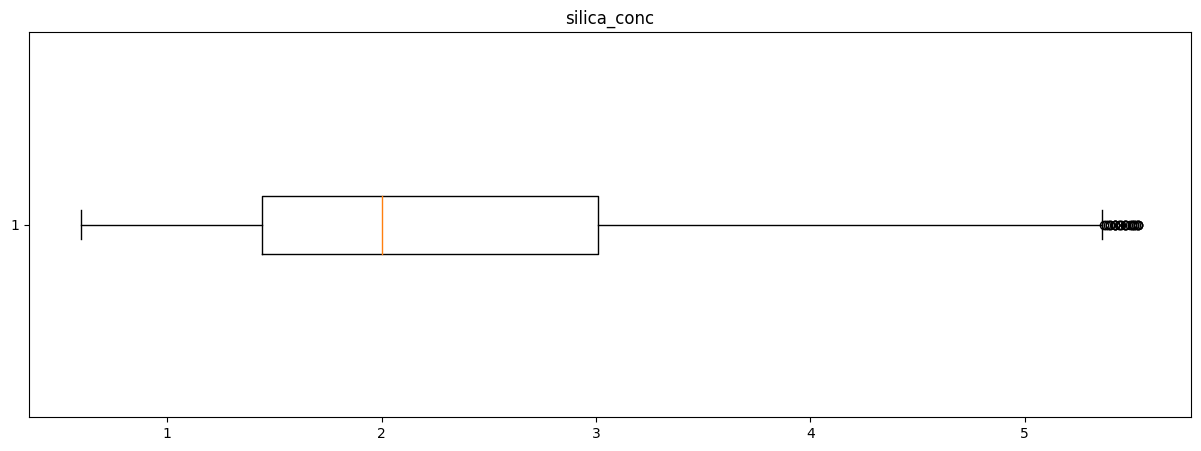

In [ ]:
data = flotation["silica_conc"]
plt.figure(figsize=(15, 5))
plt.boxplot(data, vert=False)
plt.title("silica_conc")

plt.show()

- Eliminate target variable outliers by winsorizing

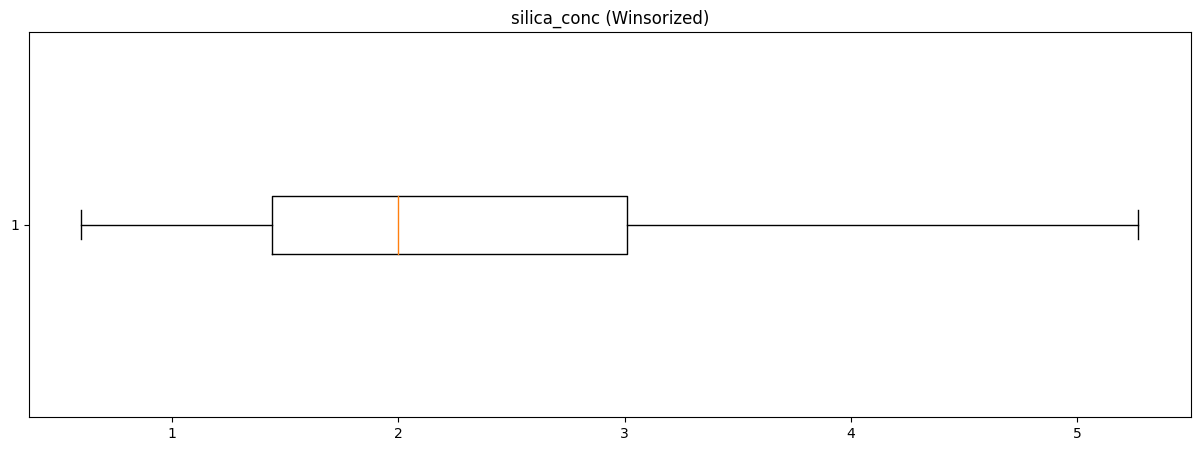

In [ ]:
data_winsorized = winsorize(flotation["silica_conc"], limits=[0, 0.01])
plt.figure(figsize=(15, 5))
plt.boxplot(data_winsorized, vert=False)
plt.title("silica_conc (Winsorized)")

plt.show()

- Check the skewness, mean and median of independent variables

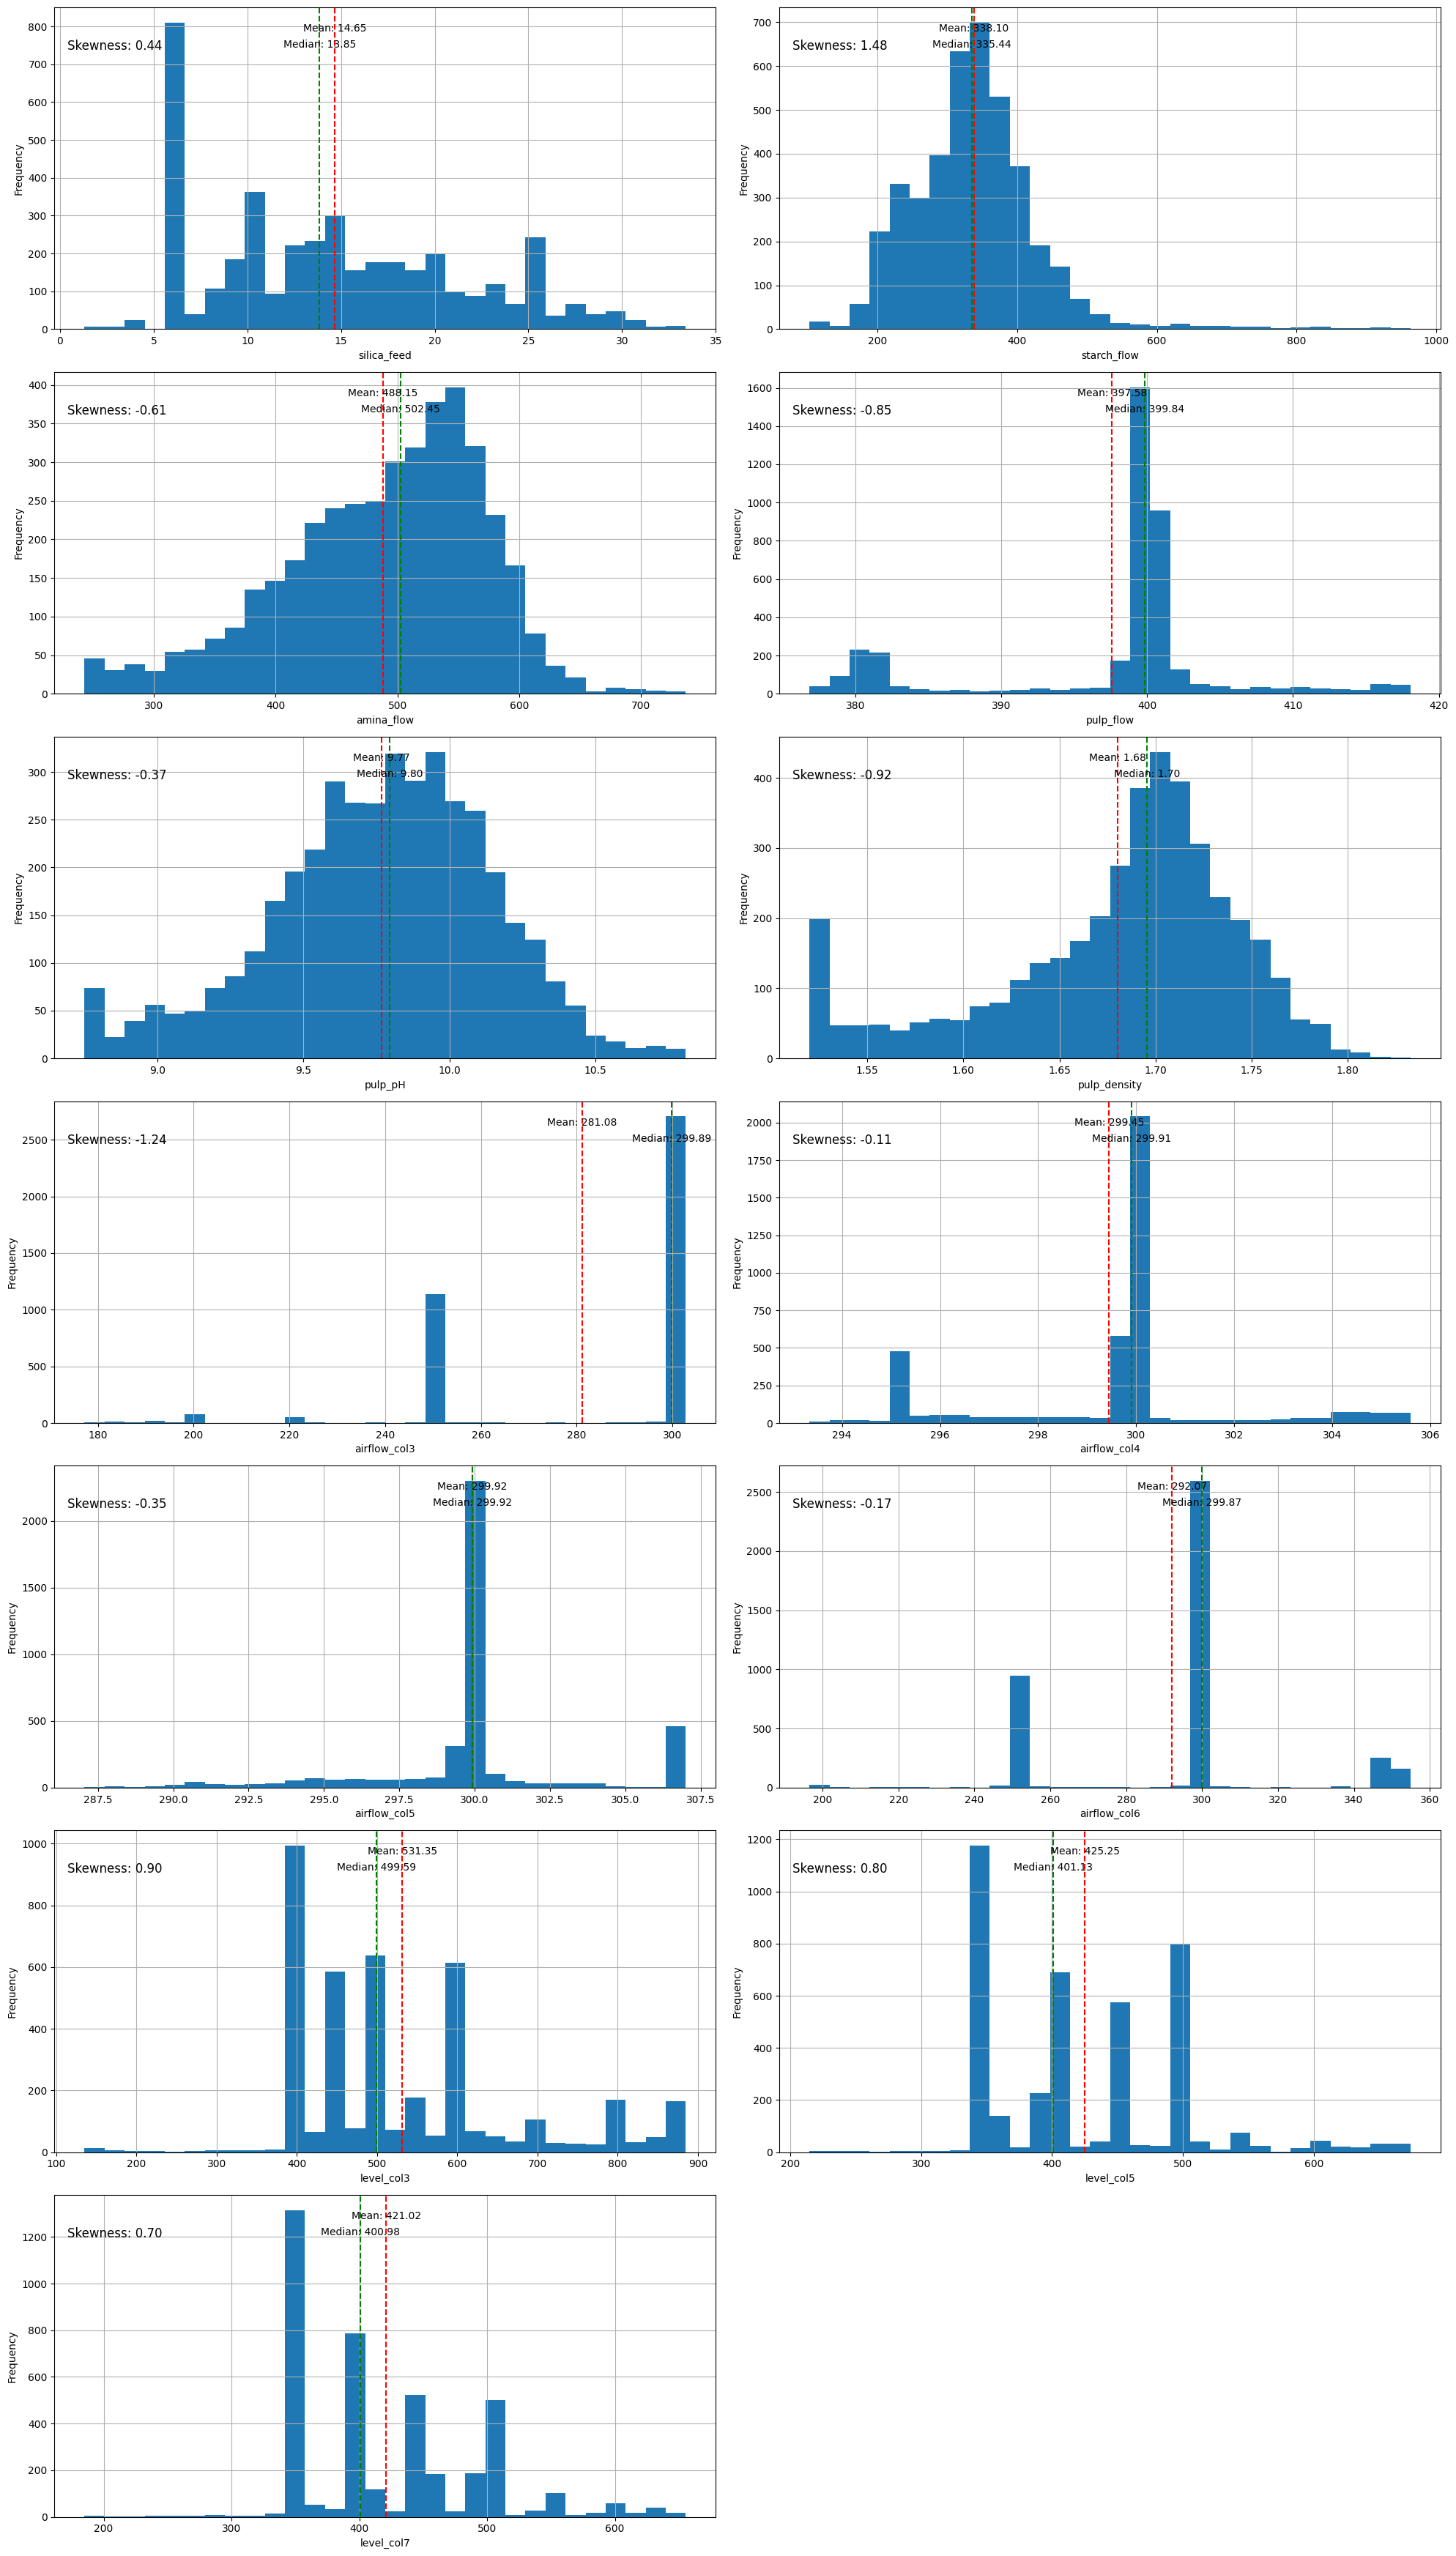

In [ ]:
from scipy.stats import skew

variables = ['silica_feed', 'starch_flow', 'amina_flow', 'pulp_flow', 'pulp_pH',
             'pulp_density', 'airflow_col3', 'airflow_col4', 'airflow_col5',
             'airflow_col6', 'level_col3', 'level_col5', 'level_col7']

num_vars = len(variables)
num_rows = (num_vars + 1) // 2

fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, variable in enumerate(variables):
    # Select a specific column for skewness calculation
    data = flotation[variable].to_numpy()
    # Calculate the skewness degree
    skewness = skew(data)
    # Determine the subplot position
    row = i // 2
    col = i % 2
    # Plotting the variable in the corresponding subplot
    axes[row, col].hist(data, bins=30)
    axes[row, col].set_xlabel(variable)
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].axvline(np.mean(data), color='r', linestyle='--')
    axes[row, col].axvline(np.median(data), color='g', linestyle='--')
    # Display the skewness degree in the plot frame
    axes[row, col].text(0.02, 0.9, f"Skewness: {skewness:.2f}",
                        transform=axes[row, col].transAxes, 
                        fontsize=12, verticalalignment='top')
    # Display the mean and median values near the lines
    ylim = axes[row, col].get_ylim()
    y_range = ylim[1] - ylim[0]
    axes[row, col].text(np.mean(data), ylim[1] - 0.05 * y_range,
                        f"Mean: {np.mean(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')
    axes[row, col].text(np.median(data), ylim[1] - 0.1 * y_range,
                        f"Median: {np.median(data):.2f}", color='black', fontsize=10,
                        verticalalignment='top', horizontalalignment='center')
    # Add grid to the subplot
    axes[row, col].grid(True)

if num_vars % 2 != 0:
    axes[num_rows - 1, 1].axis('off')

plt.tight_layout()
plt.show()

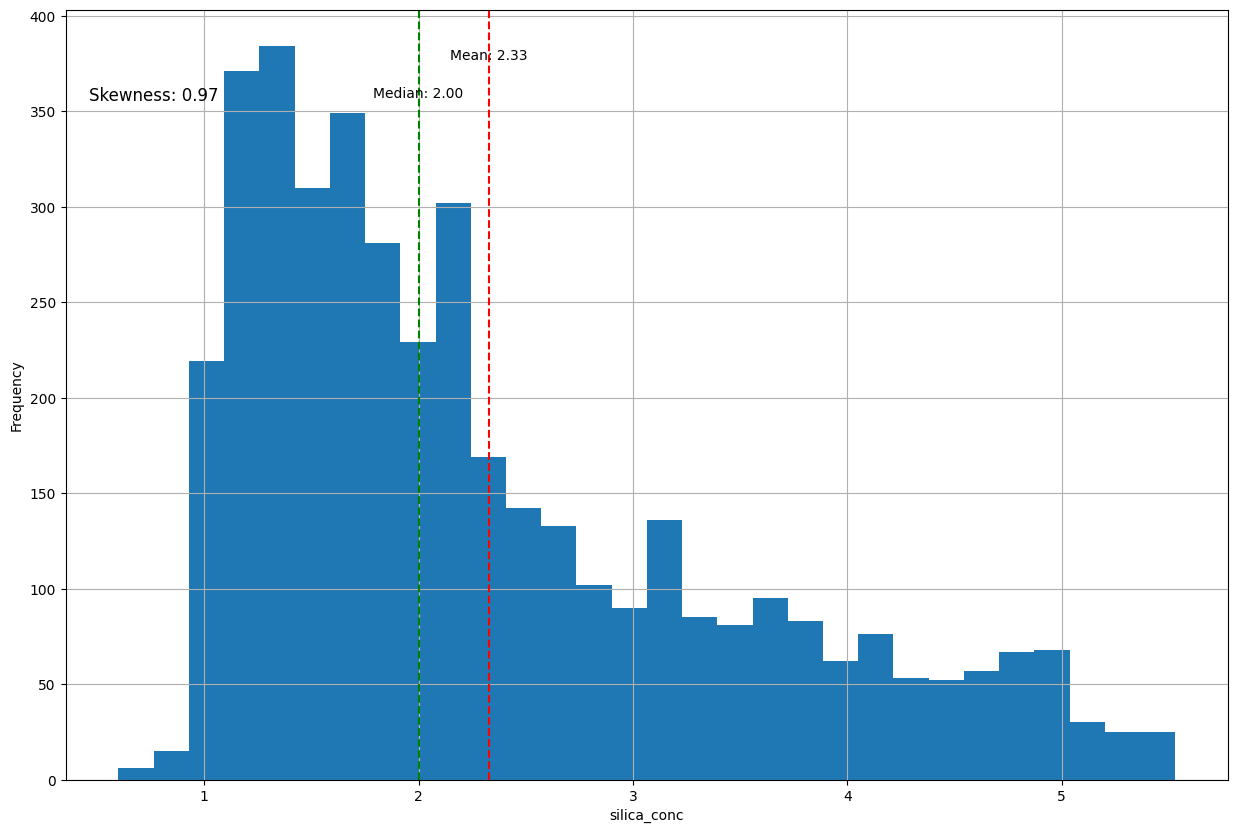

In [ ]:
from scipy.stats import skew

# Select the specific column for skewness calculation
data = flotation['silica_conc'].to_numpy()

# Calculate the skewness degree
skewness = skew(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the histogram
ax.hist(data, bins=30)
ax.set_xlabel('silica_conc')
ax.set_ylabel('Frequency')
ax.axvline(np.mean(data), color='r', linestyle='--')
ax.axvline(np.median(data), color='g', linestyle='--')

# Display the skewness degree in the plot
ax.text(0.02, 0.9, f"Skewness: {skewness:.2f}", transform=ax.transAxes,
        fontsize=12, verticalalignment='top')

# Display the mean and median values near the lines
ylim = ax.get_ylim()
y_range = ylim[1] - ylim[0]
ax.text(np.mean(data), ylim[1] - 0.05 * y_range,
         f"Mean: {np.mean(data):.2f}", color='black', fontsize=10,
         verticalalignment='top', horizontalalignment='center')
ax.text(np.median(data), ylim[1] - 0.1 * y_range,
         f"Median: {np.median(data):.2f}", color='black', fontsize=10,
         verticalalignment='top', horizontalalignment='center')

# Add grid
ax.grid(True)

plt.show()

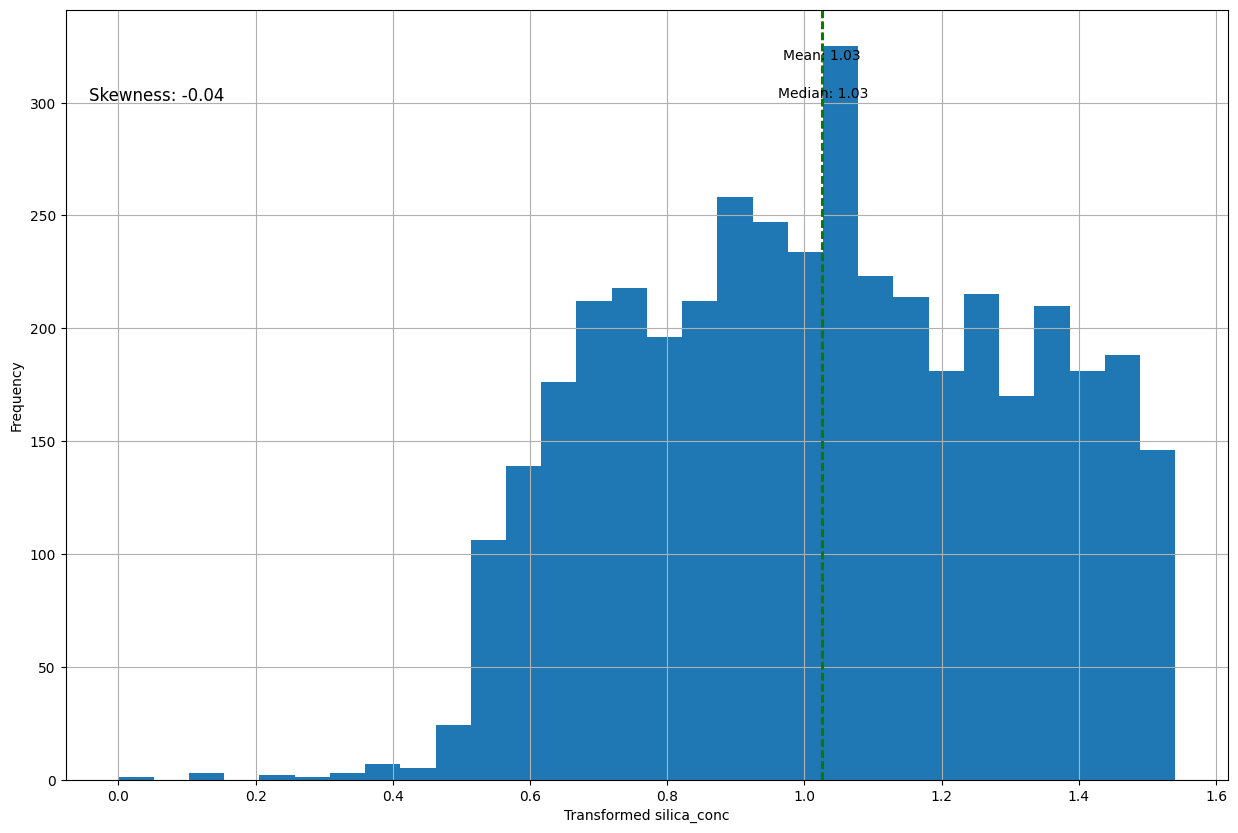

In [ ]:
from scipy.stats import boxcox

# Select the specific column for transformation
data = flotation['silica_conc'].to_numpy()

# Shift the data by a constant value
shifted_data = data - np.min(data) + 1  # Add 1 to ensure all values are positive

# Apply the Box-Cox transformation
data_transformed, lambda_value = boxcox(shifted_data)

# Update the 'silica_conc' column in the 'flotation' DataFrame with the transformed values
flotation['silica_conc'] = data_transformed

# Calculate the skewness of the transformed data
skewness_transformed = skew(data_transformed)

# Plot the histogram of the transformed data
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(data_transformed, bins=30)
ax.set_xlabel('Transformed silica_conc')
ax.set_ylabel('Frequency')
ax.axvline(np.mean(data_transformed), color='r', linestyle='--')
ax.axvline(np.median(data_transformed), color='g', linestyle='--')

# Display the skewness degree in the plot
ax.text(0.02, 0.9, f"Skewness: {skewness_transformed:.2f}", transform=ax.transAxes,
        fontsize=12, verticalalignment='top')

# Display the mean and median values near the lines
ylim = ax.get_ylim()
y_range = ylim[1] - ylim[0]
ax.text(np.mean(data_transformed), ylim[1] - 0.05 * y_range,
         f"Mean: {np.mean(data_transformed):.2f}", color='black', fontsize=10,
         verticalalignment='top', horizontalalignment='center')
ax.text(np.median(data_transformed), ylim[1] - 0.1 * y_range,
         f"Median: {np.median(data_transformed):.2f}", color='black', fontsize=10,
         verticalalignment='top', horizontalalignment='center')

ax.grid(True)
plt.show()


In [ ]:
flotation.to_csv('/content/drive/My Drive/Flotation/Flotation_Plant_GRManipulated.csv', index=False)